In [2]:
import numpy as np 
import pandas as pd


In [6]:
census = pd.read_csv('../acs2015_county_data.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [7]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


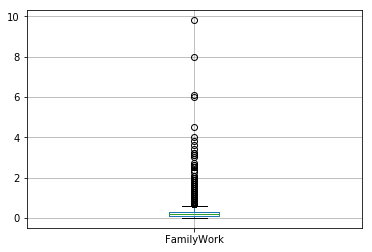

In [10]:
census.boxplot(column="FamilyWork")

In [43]:
q1 = np.percentile(census.FamilyWork, 25)
q3 = np.percentile(census.FamilyWork, 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr
census_without_outliers = census[(census.FamilyWork < upper_fence) & (census.FamilyWork > lower_fence)]
census_without_outliers

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,NativeRateRounded,TotalPopScaled
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.088,0.001,0.005,0.013,0.018,239.86,0.736,0.209,0.004,0.005493
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0.088,0.001,0.010,0.014,0.039,859.53,0.815,0.123,0.006,0.019429
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.109,0.004,0.018,0.015,0.016,85.97,0.718,0.208,0.002,0.002674
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.135,0.005,0.006,0.015,0.007,82.94,0.768,0.161,0.004,0.002243
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.112,0.004,0.009,0.004,0.023,221.89,0.820,0.135,0.003,0.005741
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,0.149,0.007,0.050,0.017,0.028,38.65,0.795,0.151,0.012,0.001055
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.124,0.000,0.008,0.006,0.017,78.13,0.774,0.162,0.001,0.002019
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,0.094,0.002,0.012,0.012,0.027,474.01,0.741,0.208,0.002,0.011612
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.119,0.002,0.003,0.004,0.021,136.89,0.851,0.121,0.002,0.003386
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,0.121,0.002,0.006,0.007,0.025,101.55,0.731,0.185,0.006,0.002582


In [12]:
# Scaling
census['HispanicRate'] = census['Hispanic'] / 100

In [13]:
def to_percent(x): 
    return(x/100) 

conversion_list = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 
                   'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 
                   'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 
                   'WorkAtHome', 'Employed', 'PrivateWork', 'PublicWork']

In [14]:
# we create a new list of columns. We prefer doing this since we'd rather keep the old data around just in case:
new_column_list = [x+'Rate' for x in conversion_list] 
census[new_column_list] = census[conversion_list].apply(to_percent) 

In [18]:
# Let's look at the Black rate to be sure this worked:
census.BlackRate 

0       0.185
1       0.095
2       0.467
3       0.214
4       0.015
5       0.707
6       0.438
7       0.203
8       0.403
9       0.048
10      0.102
11      0.429
12      0.453
13      0.144
14      0.029
15      0.172
16      0.156
17      0.447
18      0.307
19      0.130
20      0.235
21      0.011
22      0.194
23      0.692
24      0.018
25      0.210
26      0.334
27      0.154
28      0.120
29      0.041
        ...  
3190    0.000
3191    0.001
3192    0.000
3193    0.000
3194    0.000
3195    0.000
3196    0.000
3197    0.000
3198    0.000
3199    0.001
3200    0.002
3201    0.000
3202    0.001
3203    0.000
3204    0.001
3205    0.001
3206    0.002
3207    0.000
3208    0.000
3209    0.000
3210    0.001
3211    0.001
3212    0.000
3213    0.001
3214    0.000
3215    0.001
3216    0.000
3217    0.000
3218    0.000
3219    0.000
Name: BlackRate, Length: 3220, dtype: float64

In [19]:
# Rounding
census['NativeRateRounded'] = round(census['NativeRate'], 3) 
census.NativeRateRounded

0       0.004
1       0.006
2       0.002
3       0.004
4       0.003
5       0.012
6       0.001
7       0.002
8       0.002
9       0.006
10      0.004
11      0.000
12      0.000
13      0.007
14      0.002
15      0.008
16      0.006
17      0.003
18      0.001
19      0.005
20      0.008
21      0.004
22      0.005
23      0.002
24      0.011
25      0.002
26      0.032
27      0.003
28      0.000
29      0.007
        ...  
3190    0.000
3191    0.000
3192    0.000
3193    0.000
3194    0.000
3195    0.000
3196    0.000
3197    0.000
3198    0.000
3199    0.000
3200    0.000
3201    0.000
3202    0.000
3203    0.000
3204    0.000
3205    0.000
3206    0.000
3207    0.000
3208    0.000
3209    0.000
3210    0.000
3211    0.000
3212    0.000
3213    0.000
3214    0.000
3215    0.000
3216    0.000
3217    0.000
3218    0.000
3219    0.000
Name: NativeRateRounded, Length: 3220, dtype: float64

In [20]:
# Standardization
from sklearn.preprocessing import MinMaxScaler 

# This code uses the reshape function to change the input into a two dimensional numpy array since 
# this is the input that the function takes.

census['TotalPopScaled'] = MinMaxScaler().fit_transform(census.TotalPop.values.reshape(-1,1))
census.TotalPopScaled.describe()

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


count    3220.000000
mean        0.009895
std         0.031809
min         0.000000
25%         0.001109
50%         0.002585
75%         0.006609
max         1.000000
Name: TotalPopScaled, dtype: float64

In [22]:
# Dummy Variables/One Hot Encoding
states = pd.get_dummies(census.State, drop_first=True) 
census_dummy = pd.concat([census, states], axis=1) 
census_dummy.columns.values

array(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ChildPovertyRate', 'ProfessionalRate',
       'ServiceRate', 'OfficeRate', 'ConstructionRate', 'ProductionRate',
       'DriveRate', 'CarpoolRate', 'TransitRate', 'WalkRate',
       'OtherTranspRate', 'WorkAtHomeRate', 'EmployedRate',
       'PrivateWorkRate', 'PublicWorkRate', 'NativeRateRounded',
       'TotalPopScaled', 'Alaska', 'Arizona', 'Arkansas', 'California',
      

In [23]:
# Shuffling
shuffled_census = census.sample(frac=1)

In [24]:
# Sampling
# sample using proportion
census_prop_sample = census.sample(frac=0.5) 

In [25]:
# sample using number of rows
census_size_sample = census.sample(n=1000)

In [26]:
# Training
from sklearn.model_selection import train_test_split 
census_train, census_test = train_test_split(census, test_size = 0.2) 
census_train

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,NativeRateRounded,TotalPopScaled
703,18013,Indiana,Brown,15011,7521,7490,1.5,96.1,0.3,0.1,...,0.111,0.010,0.011,0.002,0.038,70.39,0.819,0.109,0.001,0.001487
374,12109,Florida,St. Johns,210495,102338,108157,5.9,84.2,5.2,0.2,...,0.083,0.002,0.010,0.024,0.067,964.36,0.830,0.121,0.002,0.020961
862,19147,Iowa,Palo Alto,9208,4618,4590,2.0,95.5,1.3,0.1,...,0.080,0.000,0.042,0.013,0.033,46.37,0.731,0.177,0.001,0.000909
3021,54059,West Virginia,Mingo,25931,12686,13245,0.4,96.0,1.4,0.1,...,0.120,0.000,0.032,0.002,0.020,79.51,0.735,0.216,0.001,0.002575
325,12011,Florida,Broward,1843152,894820,948332,27.0,40.4,26.9,0.2,...,0.094,0.031,0.012,0.020,0.049,8909.97,0.822,0.113,0.002,0.183603
2423,46125,South Dakota,Turner,8302,4176,4126,2.0,95.8,0.6,0.5,...,0.117,0.001,0.061,0.010,0.075,42.48,0.704,0.119,0.005,0.000819
923,20071,Kansas,Greeley,1224,611,613,22.7,73.6,0.9,0.6,...,0.096,0.000,0.038,0.024,0.086,5.92,0.642,0.191,0.006,0.000113
1104,21223,Kentucky,Trimble,8783,4363,4420,3.0,96.4,0.0,0.0,...,0.101,0.000,0.003,0.011,0.023,35.98,0.831,0.111,0.000,0.000866
2212,41009,Oregon,Columbia,49389,24694,24695,4.6,89.5,0.5,1.2,...,0.121,0.008,0.025,0.008,0.054,203.62,0.795,0.127,0.012,0.004912
1784,34021,New Jersey,Mercer,370212,181158,189054,16.2,52.3,19.6,0.1,...,0.096,0.081,0.031,0.020,0.051,1776.09,0.781,0.174,0.001,0.036871


In [28]:
census_test

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,NativeRateRounded,TotalPopScaled
1401,28001,Mississippi,Adams,31979,16214,15765,5.9,37.9,55.3,0.0,...,0.075,0.002,0.005,0.013,0.032,107.30,0.765,0.168,0.000,0.003177
2312,44003,Rhode Island,Kent,164958,79650,85308,4.0,90.2,1.3,0.1,...,0.085,0.012,0.010,0.004,0.027,862.74,0.826,0.127,0.001,0.016424
952,20129,Kansas,Morton,3106,1648,1458,20.5,74.2,0.9,0.5,...,0.142,0.000,0.056,0.004,0.045,14.08,0.663,0.217,0.005,0.000301
2283,42079,Pennsylvania,Luzerne,320095,157486,162609,8.6,85.7,3.2,0.1,...,0.109,0.012,0.031,0.009,0.031,1472.43,0.837,0.113,0.001,0.031879
874,19171,Iowa,Tama,17479,8637,8842,8.0,83.2,0.5,6.5,...,0.125,0.001,0.031,0.017,0.040,82.83,0.756,0.144,0.065,0.001733
103,4013,Arizona,Maricopa,4018143,1986158,2031985,30.1,57.3,4.9,1.6,...,0.110,0.024,0.016,0.026,0.059,18210.38,0.825,0.117,0.016,0.400273
2343,45055,South Carolina,Kershaw,62722,30405,32317,4.1,68.9,24.7,0.2,...,0.091,0.003,0.010,0.013,0.033,263.60,0.771,0.175,0.002,0.006240
266,8043,Colorado,Fremont,46809,27003,19806,13.0,78.0,5.1,1.3,...,0.113,0.004,0.032,0.033,0.040,139.83,0.662,0.270,0.013,0.004655
1584,29205,Missouri,Shelby,6179,3066,3113,1.3,96.6,1.6,0.0,...,0.092,0.004,0.034,0.006,0.078,28.88,0.744,0.135,0.000,0.000607
285,8081,Colorado,Moffat,13117,6830,6287,14.3,82.2,0.5,1.0,...,0.172,0.007,0.064,0.013,0.043,63.43,0.782,0.135,0.010,0.001298
